<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial_Intelligence_Course/blob/main/GK_kinds_of_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

#Kết nối với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Giai nen tập dữ liệu rar
!apt-get install -y unrar

rar_file_path = "/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/archive.rar" 
extract_path = "/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar" 
!unrar x '{rar_file_path}' '{extract_path}'

In [ ]:
# Khai báo các thông số cho việc train mô hình
batch_size = 32
epochs = 30
num_classes = 5
input_shape = (150, 150, 3)

In [ ]:
# Chuẩn bị dữ liệu huấn luyện và xác thực
train_data = '/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar/archive/flowers'
valid_data = '/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar/archive/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train_datagen.flow_from_directory(train_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 3522 images belonging to 5 classes.


In [ ]:
validation_dataset = validation_datagen.flow_from_directory(valid_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 308 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'calendula': 2,
 'carnation': 3,
 'common_daisy': 4}

In [ ]:
# Xây dựng mô hình CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
history = model.fit(train_dataset,epochs=epochs, validation_data=validation_dataset)

Epoch 1/30
111/111 [==============================] - 36s 285ms/step - loss: 0.9649 - accuracy: 0.6405 - val_loss: 0.8965 - val_accuracy: 0.6623
Epoch 2/30
111/111 [==============================] - 30s 272ms/step - loss: 0.7110 - accuracy: 0.7385 - val_loss: 0.9355 - val_accuracy: 0.6396
Epoch 3/30
111/111 [==============================] - 30s 269ms/step - loss: 0.6446 - accuracy: 0.7666 - val_loss: 0.7604 - val_accuracy: 0.7305
Epoch 4/30
111/111 [==============================] - 31s 277ms/step - loss: 0.5741 - accuracy: 0.7936 - val_loss: 0.6434 - val_accuracy: 0.7662
Epoch 5/30
111/111 [==============================] - 30s 274ms/step - loss: 0.4984 - accuracy: 0.8299 - val_loss: 0.6365 - val_accuracy: 0.7922
Epoch 6/30
111/111 [==============================] - 31s 275ms/step - loss: 0.4535 - accuracy: 0.8325 - val_loss: 0.5688 - val_accuracy: 0.8279
Epoch 7/30
111/111 [==============================] - 30s 273ms/step - loss: 0.4150 - accuracy: 0.8538 - val_loss: 0.5243 - val_ac

In [ ]:
# Save model
model.save('/content/drive/MyDrive/AI_COURSE/Bai Tap /Report/kinds_of_flowers.h5')

In [ ]:
from keras.models import load_model
classification_flower_model = load_model('/content/drive/MyDrive/AI_COURSE/Bai Tap /Report/kinds_of_flowers.h5')

In [ ]:
score=classification_flower_model.evaluate(validation_dataset, verbose=0)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  0.9691367149353027
Test accuracy =  0.798701286315918


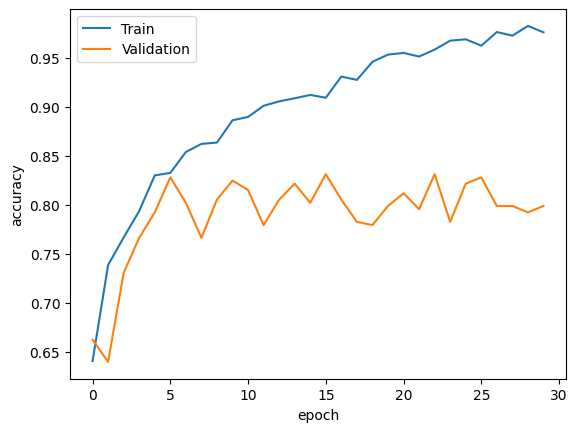

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 567ms/step
Predict is:  astilbe


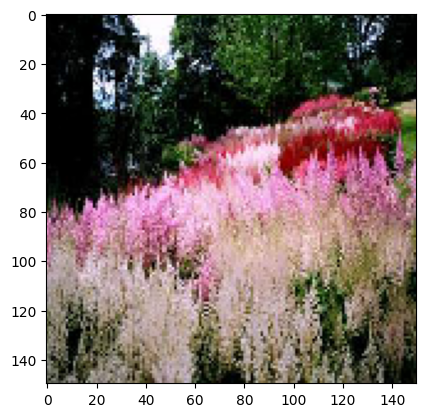

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar/archive/test/astilbe/121833397_0139a4bf24_c.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['astilbe','bellflower','calendula','carnation','common_daisy']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])


1/1 [==============================] - 0s 30ms/step
Predict is:  bellflower


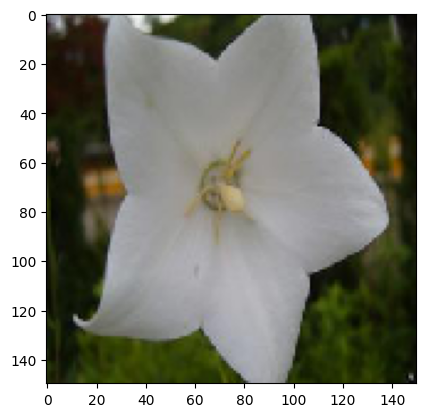

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar/archive/test/bellflower/1033821255_849fb0ddc9_c.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['astilbe','bellflower','calendula','carnation','common_daisy']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 21ms/step
Predict is:  calendula


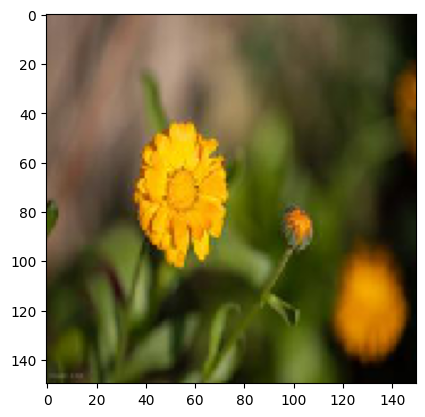

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar/archive/test/calendula/51288045569_5caa4fc947_c.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['astilbe','bellflower','calendula','carnation','common_daisy']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 48ms/step
Predict is:  carnation


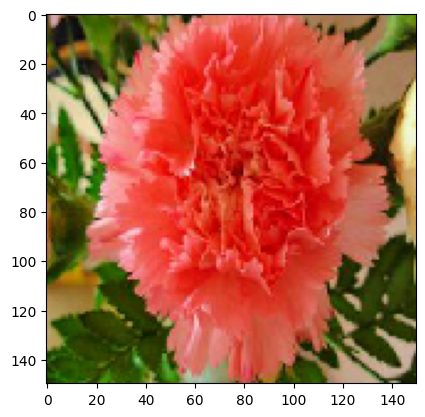

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar/archive/test/carnation/105375746_1ea232096f_c.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['astilbe','bellflower','calendula','carnation','common_daisy']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 26ms/step
Predict is:  common_daisy


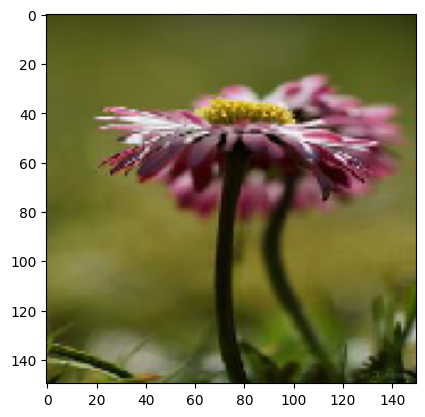

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Flower/rar/archive/test/common_daisy/26078883492_5d1df66982_c.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['astilbe','bellflower','calendula','carnation','common_daisy']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])